# Color Normalization

This notebook contains various methods for trying to normalize the colors of the sarcoma and carcinoma image dataset.

### Importing Libraries

In [1]:
import numpy as np
from PIL import Image
from PIL import Image
from PIL import ImageOps
import colorsys
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

### Finding and Loading an Image

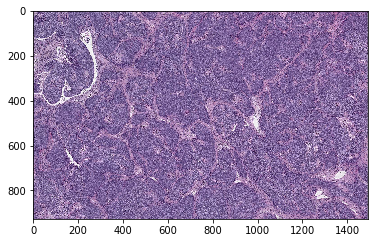

In [2]:
img = mpimg.imread('test/c/114868-125-R-FCW 4x.jpg')
imgplot = plt.imshow(img)

## Color Normalization Algorithm

Normalizing images a different way, which involves: $R = 255 * \frac{R}{(R + G + B)}$ , $G = 255 * \frac{G}{(R + G + B)}$, and $B = 255 * \frac{B}{(R + G + B)}$. Also referred to as "RGB Max" technique.

In [3]:
def normalize_colors(imgdir):
    
    # Opening and preparing the image
    im = Image.open(imgdir, 'r')
    width, height = im.size
    
    # Data of pixels
    data = np.array(im)

    # Used for traversing through the image
    total_size = data[:,:,0].size
    inner_size = data[:,:,0][0].size
    outer_size = int(total_size / inner_size)

    # Traversing through the image
    for i in range(0, outer_size):
        for j in range(0, inner_size):

            # Calculating sum
            summa = int(data[:,:,0][i][j]) + int(data[:,:,1][i][j]) + int(data[:,:,2][i][j])
            
            # Normalizing colors
            if (summa != 0):
                data[:,:,0][i][j] = int(float(data[:,:,0][i][j]) / summa * 255)    
                data[:,:,1][i][j] = int(float(data[:,:,1][i][j]) / summa * 255)
                data[:,:,2][i][j] = int(float(data[:,:,2][i][j]) / summa * 255)

    # Creating the normalized image
    im = Image.fromarray(data)
    im.save('fig1_modified.png')

### Testing out an image

Testing out normalization of colors!

In [4]:
normalize_colors('test/c/114868-125-R-FCW 4x.jpg')